In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [20]:
df = pd.read_csv("air_quality.csv", encoding="ISO-8859-1")

In [21]:
print("Initial Data Info:")
print(df.info())

Initial Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   NO2         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB
None


In [22]:
df = df.drop_duplicates()

In [23]:
print("\nMissing Values Before Cleaning:")
print(df.isna().sum())


Missing Values Before Cleaning:
City              0
Date              0
PM2.5          4598
PM10          11140
NO             3582
NO2            3585
NOx            4185
NH3           10328
CO             2059
SO2            3854
O3             4022
Benzene        5623
Toluene        8041
Xylene        18109
AQI            4681
AQI_Bucket     4681
dtype: int64


In [24]:
df = df.drop(['AQI_Bucket'], axis=1)  

In [8]:
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'string':
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        df[col] = df[col].fillna(df[col].mean())

In [25]:
subSet1 = df[['City', 'NO2']]
subSet2 = df[['City', 'SO2']]
concatenated_df = pd.concat([subSet1, subSet2], axis=1)

In [26]:
def remove_outliers(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    threshold = 1.5 * IQR
    outlier_mask = (column < Q1 - threshold) | (column > Q3 + threshold)
    return column[~outlier_mask]

numeric_columns = ['PM2.5', 'PM10', 'NO2', 'CO', 'SO2', 'O3', 'AQI']
for col in numeric_columns:
    df[col] = remove_outliers(df[col])

In [27]:
encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'string':
        df[col] = encoder.fit_transform(df[col])

In [28]:

print("\nCleaned Data Preview:")
print(df.head())


Cleaned Data Preview:
   City  Date  PM2.5  PM10     NO    NO2    NOx  NH3    CO    SO2     O3  \
0     0     0    NaN   NaN   0.92  18.22  17.15  NaN  0.92  27.64    NaN   
1     0     1    NaN   NaN   0.97  15.69  16.46  NaN  0.97  24.55  34.06   
2     0     2    NaN   NaN  17.40  19.30  29.70  NaN   NaN  29.07  30.70   
3     0     3    NaN   NaN   1.70  18.48  17.97  NaN  1.70  18.59  36.08   
4     0     4    NaN   NaN  22.10  21.42  37.76  NaN   NaN    NaN  39.31   

   Benzene  Toluene  Xylene  AQI  
0     0.00     0.02    0.00  NaN  
1     3.68     5.50    3.77  NaN  
2     6.80    16.40    2.25  NaN  
3     4.43    10.14    1.00  NaN  
4     7.01    18.89    2.78  NaN  


In [29]:
df = df.dropna()


In [30]:
df.columns = df.columns.str.strip().str.lower()

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

df = df.dropna(subset=['aqi'])

X = df.drop(columns=['aqi'])
y = df['aqi']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R² Score: {r2:.2f}")


Mean Squared Error (MSE): 457.79
R² Score: 0.88


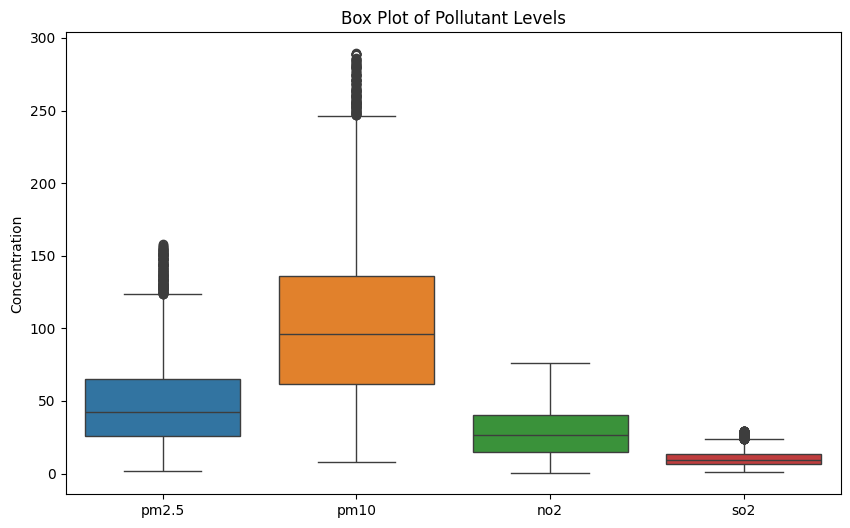

In [ ]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['pm2.5', 'pm10', 'no2', 'so2']])
plt.title('Box Plot')
plt.ylabel('Concentration')
plt.show()


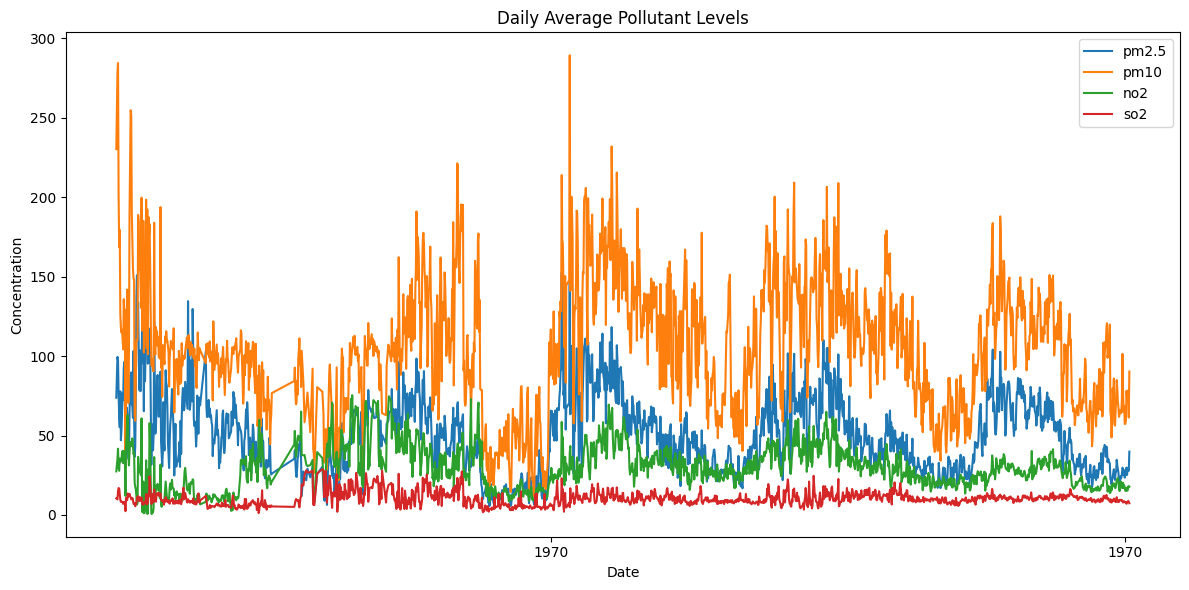

In [ ]:
import matplotlib.pyplot as plt

df['date'] = pd.to_datetime(df['date'], errors='coerce')

daily_avg = df.groupby('date')[['pm2.5', 'pm10', 'no2', 'so2']].mean()

plt.figure(figsize=(12, 6))
for col in daily_avg.columns:
    plt.plot(daily_avg.index, daily_avg[col], label=col)

plt.xlabel('Date')
plt.ylabel('Concentration')
plt.title('Daily Average')
plt.legend()
plt.tight_layout()
plt.show()
